(mathematical-optimization)=

# Mathematical optimization: finding minima of functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

**Authors**: _Gaël Varoquaux_

[Mathematical optimization](https://en.wikipedia.org/wiki/Mathematical_optimization) deals with the
problem of finding numerically minimums (or maximums or zeros) of
a function. In this context, the function is called _cost function_, or
_objective function_, or _energy_.

Here, we are interested in using {mod}`scipy.optimize` for black-box
optimization: we do not rely on the mathematical expression of the
function that we are optimizing. Note that this expression can often be
used for more efficient, non black-box, optimization.

:::{admonition} Prerequisites

- {ref}`NumPy <numpy>`
- {ref}`SciPy <scipy>`
- {ref}`Matplotlib <matplotlib>`

:::

:::{admonition} See also

**References**

Mathematical optimization is very ... mathematical. If you want
performance, it really pays to read the books:

- [Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/)
  by Boyd and Vandenberghe (pdf available free online).
- [Numerical
  Optimization](https://users.eecs.northwestern.edu/~nocedal/book/num-opt.html)
  by Nocedal and Wright. Detailed reference on gradient descent methods.
- [Practical Methods of
  Optimization](https://www.amazon.com/gp/product/0471494631/ref=ox_sc_act_title_1?ie=UTF8&smid=ATVPDKIKX0DER)
  by Fletcher. Good at hand-waving explanations.

:::

<!---
XXX: should I discuss root finding?
-->

## Knowing your problem

Not all optimization problems are equal. Knowing your problem enables you
to choose the right tool.

:::{admonition} Dimensionality of the problem
The scale of an optimization problem is pretty much set by the
_dimensionality of the problem_, i.e. the number of scalar variables
on which the search is performed.

:::

### Convex versus non-convex optimization

::: {list-table}

- - ::: {glue} convex_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} non_convex_func
    :doc: optimization_examples.md
    :::
- - **A convex function**:

    - $f$ is above all its tangents.
    - Equivalently, for two points $A, B$, $f(C)$ lies below the segment
      $[f(A), f(B])]$, if $A < C < B$.

  - **A non-convex function**

:::

::: {admonition} Plot code
:class: dropdown

See [convex, non-convex function plots](convex-function-eg).

:::

**Optimizing convex functions is easy. Optimizing non-convex functions can
be very hard.**

:::{note}
It can be proven that for a convex function a local minimum is
also a global minimum. Then, in some sense, the minimum is unique.
:::

### Smooth and non-smooth problems

::: {list-table}

- - ::: {glue} smooth_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} non_smooth_func
    :doc: optimization_examples.md
    :::

- - **A smooth function**:

    The gradient is defined everywhere, and is a continuous function

  - **A non-smooth function**

:::

::: {admonition} Plot code
:class: dropdown

See [smooth, non-smooth function plots](smooth-function-eg).

:::

**Optimizing smooth functions is easier**
(true in the context of _black-box_ optimization, otherwise
[Linear Programming](https://en.wikipedia.org/wiki/Linear_programming)
is an example of methods which deal very efficiently with
piece-wise linear functions).

### Noisy versus exact cost functions

::: {list-table}

- - Noisy (blue) and non-noisy (orange) functions
  - ::: {glue} noisy_non_noisy
    :doc: optimization_examples.md
    :::

:::

::: {admonition} Plot code
:class: dropdown

See [noisy, non-noisy function plots](noisy-non-noisy-eg).

:::

:::{admonition} Noisy gradients
Many optimization methods rely on gradients of the objective function.
If the gradient function is not given, they are computed numerically,
which induces errors. In such situation, even if the objective
function is not noisy, a gradient-based optimization may be a noisy
optimization.
:::

### Constraints

::: {list-table}

- - Optimizations under constraints

    Here:

    $-1 < x_1 < 1$

    $-1 < x_2 < 1$

  - ::: {glue} constraints_no_path
    :doc: optimization_examples.md
    :::

:::

::: {admonition} Plot code
:class: dropdown

See [constraint plots](constraints-eg).

:::

## A review of the different optimizers

### Getting started: 1D optimization

Let's get started by finding the minimum of the scalar function
$f(x)=\exp[(x-0.5)^2]$. {func}`scipy.optimize.minimize_scalar` uses
Brent's method to find the minimum of a function:

In [2]:
def f(x):
    return -np.exp(-(x - 0.5)**2)

result = sp.optimize.minimize_scalar(f)
result.success # check if solver was successful

True

In [3]:
x_min = result.x
x_min

np.float64(0.5000000058670102)

In [4]:
x_min - 0.5

np.float64(5.867010210991452e-09)

::: {list-table} **Brent's method on a quadratic function**: it converges in 3 iterations, as the quadratic approximation is then exact.

- - ::: {glue} brent_epsilon_0_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} brent_epsilon_0_err
    :doc: optimization_examples.md
    :::

:::

::: {list-table} **Brent's method on a non-convex function**: note that the fact that the optimizer avoided the local minimum is a matter of luck.

- - ::: {glue} brent_epsilon_1_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} brent_epsilon_1_err
    :doc: optimization_examples.md
    :::

:::

::: {admonition} Plot code
:class: dropdown

See [Brent's method figures](brents-method-eg).

:::

:::{note}

You can use different solvers using the parameter `method`.

:::

:::{note}

{func}`scipy.optimize.minimize_scalar` can also be used for optimization
constrained to an interval using the parameter `bounds`.

:::

### Gradient based methods

#### Some intuitions about gradient descent

Here we focus on **intuitions**, not code. Code will follow.

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)
basically consists in taking small steps in the direction of the
gradient, that is the direction of the _steepest descent_.

::: {list-table} Fixed step gradient descent

- - **A well-conditioned quadratic function.**

  - ::: {glue} gradient_descent_q_07_gd_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_q_07_gd_err
    :doc: optimization_examples.md
    :::

- - **An ill-conditioned quadratic function.**

    The core problem of gradient-methods on ill-conditioned problems is
    that the gradient tends not to point in the direction of the
    minimum.

  - ::: {glue} gradient_descent_q_002_gd_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_q_002_gd_err
    :doc: optimization_examples.md
    :::

:::

::: {admonition} Plot code
:class: dropdown

See [gradient descent plots](gradient-descent-eg).

:::

We can see that very anisotropic ([ill-conditioned](https://en.wikipedia.org/wiki/Condition_number)) functions are harder
to optimize.

:::{admonition} Take home message: conditioning number and preconditioning
If you know natural scaling for your variables, prescale them so that
they behave similarly. This is related to [preconditioning](https://en.wikipedia.org/wiki/Preconditioner).
:::

Also, it clearly can be advantageous to take bigger steps. This
is done in gradient descent code using a
[line search](https://en.wikipedia.org/wiki/Line_search).

::: {list-table} Adaptive step gradient descent

- - A well-conditioned quadratic function.

  - ::: {glue} gradient_descent_q_07_gda_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_q_07_gda_err
    :doc: optimization_examples.md
    :::

- - An ill-conditioned quadratic function.

  - ::: {glue} gradient_descent_q_002_gda_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_q_002_gda_err
    :doc: optimization_examples.md
    :::

- - An ill-conditioned non-quadratic function.

  - ::: {glue} gradient_descent_g_002_gda_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_g_002_gda_err
    :doc: optimization_examples.md
    :::

- - An ill-conditioned very non-quadratic function.

  - ::: {glue} gradient_descent_rb_gda_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_rb_gda_err
    :doc: optimization_examples.md
    :::

:::

::: {admonition} Plot code
:class: dropdown

See [gradient descent plots](gradient-descent-eg).

:::

The more a function looks like a quadratic function (elliptic
iso-curves), the easier it is to optimize.

#### Conjugate gradient descent

The gradient descent algorithms above are toys not to be used on real
problems.

As can be seen from the above experiments, one of the problems of the
simple gradient descent algorithms, is that it tends to oscillate across
a valley, each time following the direction of the gradient, that makes
it cross the valley. The conjugate gradient solves this problem by adding
a _friction_ term: each step depends on the two last values of the
gradient and sharp turns are reduced.

::: {list-table} Conjugate gradient descent

- - An ill-conditioned non-quadratic function.

  - ::: {glue} gradient_descent_g_002_cg_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_g_002_cg_err
    :doc: optimization_examples.md
    :::

- - An ill-conditioned very non-quadratic function.

  - ::: {glue} gradient_descent_rb_cg_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_rb_cg_err
    :doc: optimization_examples.md
    :::

:::

::: {admonition} Plot code
:class: dropdown

See [gradient descent plots](gradient-descent-eg).

:::

SciPy provides {func}`scipy.optimize.minimize` to find the minimum of scalar
functions of one or more variables. The simple conjugate gradient method can
be used by setting the parameter `method` to CG

In [5]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

sp.optimize.minimize(f, [2, -1], method="CG")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.6503729082243953e-11
       x: [ 1.000e+00  1.000e+00]
     nit: 13
     jac: [-6.153e-06  2.538e-07]
    nfev: 81
    njev: 27

Gradient methods need the Jacobian (gradient) of the function. They can
compute it numerically, but will perform better if you can pass them the
gradient:

In [6]:
def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

sp.optimize.minimize(f, [2, 1], method="CG", jac=jacobian)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 2.957865890641887e-14
       x: [ 1.000e+00  1.000e+00]
     nit: 8
     jac: [ 7.183e-07 -2.990e-07]
    nfev: 16
    njev: 16

Note that the function has only been evaluated 27 times, compared to 108
without the gradient.

### Newton and quasi-newton methods

#### Newton methods: using the Hessian (2nd differential)

[Newton methods](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) use a
local quadratic approximation to compute the jump direction. For this
purpose, they rely on the 2 first derivative of the function: the
_gradient_ and the [Hessian](https://en.wikipedia.org/wiki/Hessian_matrix).

::: {list-table}

- - **An ill-conditioned quadratic function:**

    Note that, as the quadratic approximation is exact, the Newton
    method is blazing fast

  - ::: {glue} gradient_descent_q_002_ncg_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_q_002_ncg_err
    :doc: optimization_examples.md
    :::

- - **An ill-conditioned non-quadratic function:**

    Here we are optimizing a Gaussian, which is always below its
    quadratic approximation. As a result, the Newton method overshoots
    and leads to oscillations.

  - ::: {glue} gradient_descent_g_002_ncg_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_g_002_ncg_err
    :doc: optimization_examples.md
    :::

- - **An ill-conditioned very non-quadratic function:**

  - ::: {glue} gradient_descent_rb_ncg_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_rb_ncg_err
    :doc: optimization_examples.md
    :::

:::

::: {admonition} Plot code
:class: dropdown

See [gradient descent plots](gradient-descent-eg).

:::

In SciPy, you can use the Newton method by setting `method` to Newton-CG in
{func}`scipy.optimize.minimize`. Here, CG refers to the fact that an internal
inversion of the Hessian is performed by conjugate gradient.

In [7]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

sp.optimize.minimize(f, [2,-1], method="Newton-CG", jac=jacobian)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.5601357400786612e-15
       x: [ 1.000e+00  1.000e+00]
     nit: 10
     jac: [ 1.058e-07 -7.483e-08]
    nfev: 11
    njev: 33
    nhev: 0

Note that compared to a conjugate gradient (above), Newton's method has
required less function evaluations, but more gradient evaluations, as it
uses it to approximate the Hessian. Let's compute the Hessian and pass it
to the algorithm:

In [8]:
def hessian(x): # Computed with sympy
    return np.array(((1 - 4*x[1] + 12*x[0]**2, -4*x[0]), (-4*x[0], 2)))

sp.optimize.minimize(f, [2,-1], method="Newton-CG", jac=jacobian, hess=hessian)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 1.6277298383706738e-15
       x: [ 1.000e+00  1.000e+00]
     nit: 10
     jac: [ 1.110e-07 -7.781e-08]
    nfev: 11
    njev: 11
    nhev: 10

:::{note}

At very high-dimension, the inversion of the Hessian can be costly
and unstable (large scale > 250).

:::

:::{note}
Newton optimizers should not to be confused with Newton's root finding
method, based on the same principles, {func}`scipy.optimize.newton`.
:::

(quasi-newton)=

#### Quasi-Newton methods: approximating the Hessian on the fly

**BFGS**: BFGS (Broyden-Fletcher-Goldfarb-Shanno algorithm) refines at
each step an approximation of the Hessian.

::: {list-table}

- - **An ill-conditioned quadratic function:**

    On a exactly quadratic function, BFGS is not as fast as Newton's
    method, but still very fast.

  - ::: {glue} gradient_descent_q_002_bgfs_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_q_002_bgfs_err
    :doc: optimization_examples.md
    :::

- - **An ill-conditioned non-quadratic function:**

    Here BFGS does better than Newton, as its empirical estimate of the
    curvature is better than that given by the Hessian.

  - ::: {glue} gradient_descent_g_002_bgfs_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_g_002_bgfs_err
    :doc: optimization_examples.md
    :::

- - **An ill-conditioned very non-quadratic function:**

  - ::: {glue} gradient_descent_rb_bgfs_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_rb_bgfs_err
    :doc: optimization_examples.md
    :::

:::

::: {admonition} Plot code
:class: dropdown

See [gradient descent plots](gradient-descent-eg).

:::

In [9]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

sp.optimize.minimize(f, [2, -1], method="BFGS", jac=jacobian)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.630637192365927e-16
        x: [ 1.000e+00  1.000e+00]
      nit: 8
      jac: [ 6.709e-08 -3.222e-08]
 hess_inv: [[ 9.999e-01  2.000e+00]
            [ 2.000e+00  4.499e+00]]
     nfev: 10
     njev: 10

**L-BFGS:** Limited-memory BFGS sits between BFGS and conjugate gradient: in
very high dimensions (> 250) the Hessian matrix is too costly to compute and
invert. L-BFGS keeps a low-rank version. In addition, box bounds are also
supported by L-BFGS-B:

In [10]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

def jacobian(x):
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

sp.optimize.minimize(f, [2, 2], method="L-BFGS-B", jac=jacobian)

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: 1.441767747301186e-15
        x: [ 1.000e+00  1.000e+00]
      nit: 16
      jac: [ 1.023e-07 -2.593e-08]
     nfev: 17
     njev: 17
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

### Gradient-less methods

#### A shooting method: the Powell algorithm

Almost a gradient approach:

::: {list-table}

- - **An ill-conditioned quadratic function:**

    Powell's method isn't too sensitive to local ill-conditionning in
    low dimensions

  - ::: {glue} gradient_descent_q_002_pow_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_q_002_pow_err
    :doc: optimization_examples.md
    :::

- - **An ill-conditioned very non-quadratic function:**

  - ::: {glue} gradient_descent_rb_pow_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_rb_pow_err
    :doc: optimization_examples.md
    :::

:::

::: {admonition} Plot code
:class: dropdown

See [gradient descent plots](gradient-descent-eg).

:::

#### Simplex method: the Nelder-Mead

The Nelder-Mead algorithms are a generalization of dichotomy approaches to
high-dimensional spaces. The algorithm works by refining
a [simplex](https://en.wikipedia.org/wiki/Simplex), the generalization of
intervals and triangles to high-dimensional spaces, to bracket the minimum.

**Strong points**: it is robust to noise, as it does not rely on
computing gradients. Thus it can work on functions that are not locally
smooth such as experimental data points, as long as they display a
large-scale bell-shape behavior. However it is slower than gradient-based
methods on smooth, non-noisy functions.

::: {list-table}

- - **An ill-conditioned non-quadratic function:**

  - ::: {glue} gradient_descent_g_002_nm_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_g_002_nm_err
    :doc: optimization_examples.md
    :::

- - **An ill-conditioned very non-quadratic function:**

  - ::: {glue} gradient_descent_rb_nm_func
    :doc: optimization_examples.md
    :::
  - ::: {glue} gradient_descent_rb_nm_err
    :doc: optimization_examples.md
    :::

:::

::: {admonition} Plot code
:class: dropdown

See [gradient descent plots](gradient-descent-eg).

:::

Using the Nelder-Mead solver in {func}`scipy.optimize.minimize`:

In [11]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

sp.optimize.minimize(f, [2, -1], method="Nelder-Mead")

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 1.11527915993744e-10
             x: [ 1.000e+00  1.000e+00]
           nit: 58
          nfev: 111
 final_simplex: (array([[ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  1.000e+00],
                       [ 1.000e+00,  1.000e+00]]), array([ 1.115e-10,  1.537e-10,  4.988e-10]))

### Global optimizers

If your problem does not admit a unique local minimum (which can be hard
to test unless the function is convex), and you do not have prior
information to initialize the optimization close to the solution, you
may need a global optimizer.

#### Brute force: a grid search

{func}`scipy.optimize.brute` evaluates the function on a given grid of
parameters and returns the parameters corresponding to the minimum
value. The parameters are specified with ranges given to
{obj}`numpy.mgrid`. By default, 20 steps are taken in each direction:

In [12]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2

sp.optimize.brute(f, ((-1, 2), (-1, 2)))

array([1.00001462, 1.00001547])

## Practical guide to optimization with SciPy

### Choosing a method

All methods are exposed as the `method` argument of
{func}`scipy.optimize.minimize`.

::: {glue} compare_optimizers
:doc: optimization_examples.md
:::

::: {admonition} Code for plot above
:class: dropdown

See [compare optimizers](compare-optimizers-eg).

:::

::: {list-table} Rules of thumb for choosing a method

- - Without knowledge of the gradient

  - - In general, prefer **BFGS** or **L-BFGS**, even if you have to
      approximate numerically gradients. These are also the default if you
      omit the parameter `method` - depending if the problem has constraints
      or bounds.
    - On well-conditioned problems, **Powell** and **Nelder-Mead**, both
      gradient-free methods, work well in high dimension, but they collapse
      for ill-conditioned problems.

- - With knowledge of the gradient

  - - **BFGS** or **L-BFGS**.
    - Computational overhead of BFGS is larger than that L-BFGS, itself
      larger than that of conjugate gradient. On the other side, BFGS usually
      needs less function evaluations than CG. Thus conjugate gradient method
      is better than BFGS at optimizing computationally cheap functions.

- - With the Hessian

  - - If you can compute the Hessian, prefer the Newton method (**Newton-CG**
      or **TCG**).

- - If you have noisy measurements

  - - Use **Nelder-Mead** or **Powell**.

:::

### Making your optimizer faster

- Choose the right method (see above), do compute analytically the
  gradient and Hessian, if you can.
- Use [preconditionning](https://en.wikipedia.org/wiki/Preconditioner)
  when possible.
- Choose your initialization points wisely. For instance, if you are
  running many similar optimizations, warm-restart one with the results of
  another.
- Relax the tolerance if you don't need precision using the parameter `tol`.

### Computing gradients

Computing gradients, and even more Hessians, is very tedious but worth
the effort. Symbolic computation with {ref}`Sympy <sympy>` may come in
handy.

**Warning**

A _very_ common source of optimization not converging well is human
error in the computation of the gradient. You can use
{func}`scipy.optimize.check_grad` to check that your gradient is
correct. It returns the norm of the different between the gradient
given, and a gradient computed numerically:

In [13]:
sp.optimize.check_grad(f, jacobian, [2, -1])

np.float64(2.384185791015625e-07)

See also {func}`scipy.optimize.approx_fprime` to find your errors.

### Synthetic exercises

**A simple (?) quadratic function**

::: {exercise-start}
:label: mo-simple-quad-ex
:class: dropdown
:::

Optimize the following function, using K[0] as a starting point:

In [14]:
rng = np.random.default_rng(27446968)
K = rng.normal(size=(100, 100))

def f(x):
    return np.sum((K @ (x - 1))**2) + np.sum(x**2)**2

Time your approach. Find the fastest approach. Why is BFGS not
working well?

::: {exercise-end}
:::

::: {solution-start} mo-simple-quad-ex
:class: dropdown
:::

**Alternating optimization**

The challenge here is that Hessian of the problem is a very ill-conditioned
matrix. This can easily be seen, as the Hessian of the first term in simply
`2 * K.T @ K`. Thus the conditioning of the problem can be judged from looking
at the conditioning of `K`.

In [15]:
import time

rng = np.random.default_rng(27446968)

K = rng.normal(size=(100, 100))


def f(x):
    return np.sum((K @ (x - 1)) ** 2) + np.sum(x**2) ** 2


def f_prime(x):
    return 2 * K.T @ K @ (x - 1) + 4 * np.sum(x**2) * x


def hessian(x):
    H = 2 * K.T @ K + 4 * 2 * x * x[:, np.newaxis]
    return H + 4 * np.eye(H.shape[0]) * np.sum(x**2)

Some pretty plotting

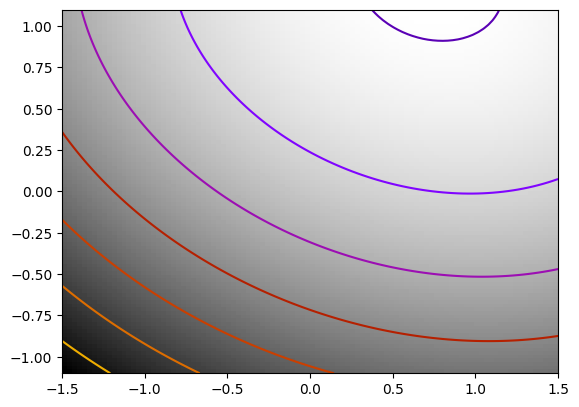

In [16]:
plt.figure()
Z = X, Y = np.mgrid[-1.5:1.5:100j, -1.1:1.1:100j]  # type: ignore[misc]
# Complete in the additional dimensions with zeros
Z = np.reshape(Z, (2, -1)).copy()
Z.resize((100, Z.shape[-1]))
Z = np.apply_along_axis(f, 0, Z)
Z = np.reshape(Z, X.shape)
plt.imshow(Z.T, cmap="gray_r", extent=(-1.5, 1.5, -1.1, 1.1), origin="lower")
plt.contour(X, Y, Z, cmap="gnuplot")

A reference but slow solution:

In [17]:
t0 = time.time()
x_ref = sp.optimize.minimize(f, K[0], method="Powell").x
print(f"     Powell: time {time.time() - t0:.2f}s")
f_ref = f(x_ref)

     Powell: time 0.10s


Compare different approaches

In [18]:
t0 = time.time()
x_bfgs = sp.optimize.minimize(f, K[0], method="BFGS").x
print(
    f"       BFGS: time {time.time() - t0:.2f}s, x error {np.sqrt(np.sum((x_bfgs - x_ref) ** 2)):.2f}, f error {f(x_bfgs) - f_ref:.2f}"
)

t0 = time.time()
x_l_bfgs = sp.optimize.minimize(f, K[0], method="L-BFGS-B").x
print(
    f"     L-BFGS: time {time.time() - t0:.2f}s, x error {np.sqrt(np.sum((x_l_bfgs - x_ref) ** 2)):.2f}, f error {f(x_l_bfgs) - f_ref:.2f}"
)

       BFGS: time 0.40s, x error 0.02, f error -0.03
     L-BFGS: time 0.03s, x error 0.02, f error -0.03


In [19]:
t0 = time.time()
x_bfgs = sp.optimize.minimize(f, K[0], jac=f_prime, method="BFGS").x
print(
    f"  BFGS w f': time {time.time() - t0:.2f}s, x error {np.sqrt(np.sum((x_bfgs - x_ref) ** 2)):.2f}, f error {f(x_bfgs) - f_ref:.2f}"
)

t0 = time.time()
x_l_bfgs = sp.optimize.minimize(f, K[0], jac=f_prime, method="L-BFGS-B").x
print(
    f"L-BFGS w f': time {time.time() - t0:.2f}s, x error {np.sqrt(np.sum((x_l_bfgs - x_ref) ** 2)):.2f}, f error {f(x_l_bfgs) - f_ref:.2f}"
)

  BFGS w f': time 0.03s, x error 0.02, f error -0.03
L-BFGS w f': time 0.00s, x error 0.02, f error -0.03


In [20]:
t0 = time.time()
x_newton = sp.optimize.minimize(
    f, K[0], jac=f_prime, hess=hessian, method="Newton-CG"
).x
print(
    f"     Newton: time {time.time() - t0:.2f}s, x error {np.sqrt(np.sum((x_newton - x_ref) ** 2)):.2f}, f error {f(x_newton) - f_ref:.2f}"
)

     Newton: time 0.00s, x error 0.02, f error -0.03


::: {solution-end}
:::

**A locally flat minimum**

::: {exercise-start}
:label: mo-flat-min-ex
:class: dropdown
:::

Consider the function `exp(-1/(.1*x**2 + y**2)`. This function admits
a minimum in (0, 0). Starting from an initialization at (1, 1), try
to get within 1e-8 of this minimum point.

This exercise is hard because the function is very flat around the minimum
(all its derivatives are zero). Thus gradient information is unreliable.

::: {exercise-end}
:::

::: {solution-start} mo-flat-min-ex
:class: dropdown
:::

**Finding a minimum in a flat neighborhood**

The function admits a minimum in [0, 0]. The challenge is to get within
1e-7 of this minimum, starting at x0 = [1, 1].

The solution that we adopt here is to give up on using gradient or
information based on local differences, and to rely on the Powell
algorithm. With 162 function evaluations, we get to 1e-8 of the
solution.

In [21]:
def f(x):
    return np.exp(-1 / (0.01 * x[0] ** 2 + x[1] ** 2))

A well-conditioned version of f:

In [22]:
def g(x):
    return f([10 * x[0], x[1]])

The gradient of g. We won't use it here for the optimization.

In [23]:
def g_prime(x):
    r = np.sqrt(x[0] ** 2 + x[1] ** 2)
    return 2 / r**3 * g(x) * x / r

result = sp.optimize.minimize(g, [1, 1], method="Powell", tol=1e-10)
x_min = result.x
x_min

array([ 1.00165881e-08, -9.59695391e-09])

Some pretty plotting:

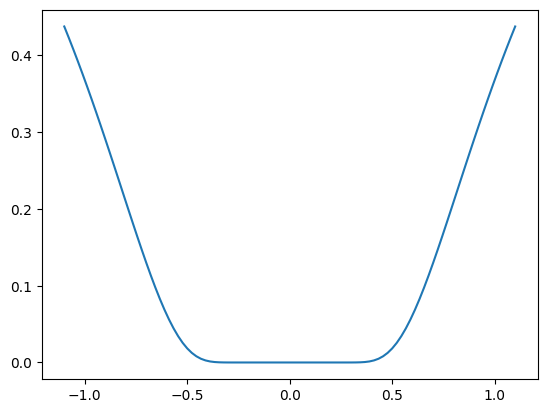

In [24]:
t = np.linspace(-1.1, 1.1, 100)
plt.plot(t, f([0, t]));

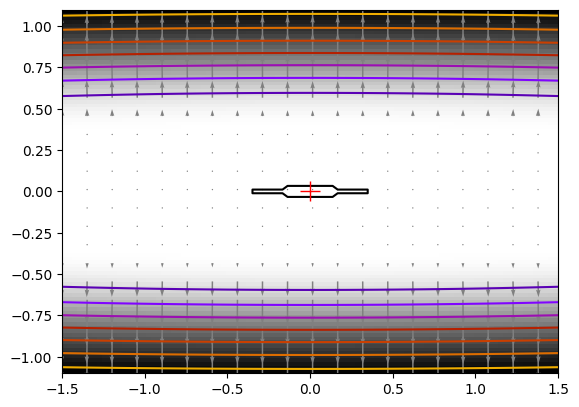

In [25]:
X, Y = np.mgrid[-1.5:1.5:100j, -1.1:1.1:100j]  # type: ignore[misc]
plt.imshow(f([X, Y]).T, cmap="gray_r", extent=(-1.5, 1.5, -1.1, 1.1), origin="lower")
plt.contour(X, Y, f([X, Y]), cmap="gnuplot")

# Plot the gradient
dX, dY = g_prime([0.1 * X[::5, ::5], Y[::5, ::5]])
# Adjust for our preconditioning
dX *= 0.1
plt.quiver(X[::5, ::5], Y[::5, ::5], dX, dY, color=".5")

# Plot our solution
plt.plot(x_min[0], x_min[1], "r+", markersize=15);

::: {solution-end}
:::

## Special case: non-linear least-squares

### Minimizing the norm of a vector function

Least square problems, minimizing the norm of a vector function, have a
specific structure that can be used in the [Levenberg–Marquardt algorithm](https://en.wikipedia.org/wiki/Levenberg-Marquardt_algorithm)
implemented in {func}`scipy.optimize.leastsq`.

Lets try to minimize the norm of the following vectorial function:

In [26]:
def f(x):
    return np.arctan(x) - np.arctan(np.linspace(0, 1, len(x)))

In [27]:
x0 = np.zeros(10)
sp.optimize.leastsq(f, x0)

(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 4)

This took 67 function evaluations (check it with 'full_output=True'). What
if we compute the norm ourselves and use a good generic optimizer (BFGS):

In [28]:
def g(x):
    return np.sum(f(x)**2)

result = sp.optimize.minimize(g, x0, method="BFGS")
result.fun

np.float64(2.6940807273387726e-11)

BFGS needs more function calls, and gives a less precise result.

:::{note}
`leastsq` is interesting compared to BFGS only if the
dimensionality of the output vector is large, and larger than the number
of parameters to optimize.
:::

:::{warning}
If the function is linear, this is a linear-algebra problem, and
should be solved with {func}`scipy.linalg.lstsq`.
:::

### Curve fitting

Least square problems occur often when fitting a non-linear to data.
While it is possible to construct our optimization problem ourselves,
SciPy provides a helper function for this purpose:
{func}`scipy.optimize.curve_fit`:

In [29]:
def f(t, omega, phi):
    return np.cos(omega * t + phi)

In [30]:
x = np.linspace(0, 3, 50)
rng = np.random.default_rng(27446968)
y = f(x, 1.5, 1) + .1*rng.normal(size=50)

In [31]:
sp.optimize.curve_fit(f, x, y)

(array([1.48121235, 0.99992781]),
 array([[ 0.00033369, -0.00049995],
        [-0.00049995,  0.00109915]]))

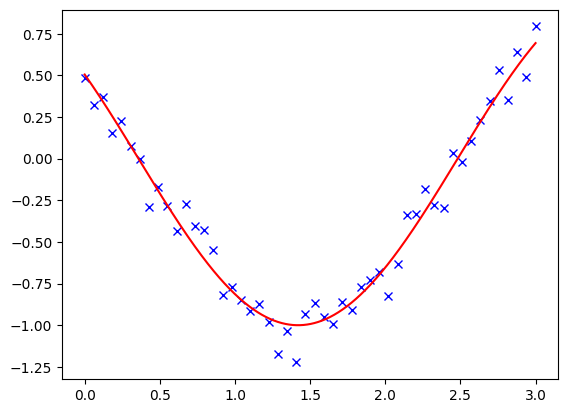

In [32]:
rng = np.random.default_rng(27446968)


# Our test function
def f(t, omega, phi):
    return np.cos(omega * t + phi)


# Our x and y data
x = np.linspace(0, 3, 50)
y = f(x, 1.5, 1) + 0.1 * np.random.normal(size=50)

# Fit the model: the parameters omega and phi can be found in the
# `params` vector
params, params_cov = sp.optimize.curve_fit(f, x, y)

# plot the data and the fitted curve
t = np.linspace(0, 3, 1000)

plt.plot(x, y, "bx")
plt.plot(t, f(t, *params), "r-");

::: {exercise-start}
:label: mo-omega3-ex
:class: dropdown
:::

Do the same with omega = 3. What is the difficulty?

::: {exercise-end}
:::

## Optimization with constraints

### Box bounds

Box bounds correspond to limiting each of the individual parameters of
the optimization. Note that some problems that are not originally written
as box bounds can be rewritten as such via change of variables. Both
{func}`scipy.optimize.minimize_scalar` and {func}`scipy.optimize.minimize`
support bound constraints with the parameter `bounds`:

In [33]:
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

sp.optimize.minimize(f, np.array([0, 0]), bounds=((-1.5, 1.5), (-1.5, 1.5)))

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: 1.5811388300841898
        x: [ 1.500e+00  1.500e+00]
      nit: 2
      jac: [-9.487e-01 -3.162e-01]
     nfev: 9
     njev: 3
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

::: {glue} constraints_path
:doc: optimization_examples.md
:::

::: {admonition} Plot code
:class: dropdown

See [constraint plots](constraints-eg).

:::

### General constraints

Equality and inequality constraints specified as functions: $f(x) = 0$
and $g(x) < 0$.

#### {func}`scipy.optimize.fmin_slsqp` Sequential least square programming: equality and inequality constraints

::: {glue} constraints_non_bounds
:doc: optimization_examples.md
:::

::: {admonition} Plot code
:class: dropdown

See [constraint non-bounds](constraints-non-bounds-eg).

:::

In [34]:
def f(x):
    return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

In [35]:
def constraint(x):
    return np.atleast_1d(1.5 - np.sum(np.abs(x)))

In [36]:
x0 = np.array([0, 0])
sp.optimize.minimize(f, x0, constraints={"fun": constraint, "type": "ineq"})

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.4748737350425016
       x: [ 1.250e+00  2.500e-01]
     nit: 5
     jac: [-7.071e-01 -7.071e-01]
    nfev: 15
    njev: 5

:::{warning}
The above problem is known as the [Lasso](<https://en.wikipedia.org/wiki/Lasso_(statistics)>)
problem in statistics, and there exist very efficient solvers for it
(for instance in [scikit-learn](https://scikit-learn.org)). In
general do not use generic solvers when specific ones exist.

:::

:::{admonition} Lagrange multipliers
If you are ready to do a bit of math, many constrained optimization
problems can be converted to non-constrained optimization problems
using a mathematical trick known as [Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier).

:::

:::{admonition} See also

**Other Software**

SciPy tries to include the best well-established, general-use,
and permissively-licensed optimization algorithms available. However,
even better options for a given task may be available in other libraries;
please also see [IPOPT] and [PyGMO].

:::

[ipopt]: https://github.com/xuy/pyipopt
[pygmo]: https://esa.github.io/pygmo2/